In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Dataset

In [4]:
df = pd.read_csv('../data/raw/tuberculosis_xray_dataset.csv')

In [5]:
df.head()

Patient_ID  Age  Gender Chest_Pain  Cough_Severity  Breathlessness  Fatigue  \
0  PID000001   69    Male        Yes               1               2        3   
1  PID000002   32  Female        Yes               3               0        9   
2  PID000003   89    Male         No               7               0        3   
3  PID000004   78  Female        Yes               2               0        6   
4  PID000005   38    Male         No               7               2        5   

   Weight_Loss     Fever Night_Sweats Sputum_Production Blood_in_Sputum  \
0         2.37  Moderate          Yes            Medium             Yes   
1         6.09  Moderate           No            Medium              No   
2         2.86      Mild          Yes            Medium              No   
3         4.57  Moderate           No              High             Yes   
4        13.86      High          Yes               Low              No   

  Smoking_History Previous_TB_History         Class  
0          Former                 Yes        Normal  
1         Current                 Yes        Normal  
2         Current                  No  Tuberculosis  
3           Never                 Yes  Tuberculosis  
4           Never                 Yes  Tuberculosis

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  object 
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Chest_Pain           20000 non-null  object 
 4   Cough_Severity       20000 non-null  int64  
 5   Breathlessness       20000 non-null  int64  
 6   Fatigue              20000 non-null  int64  
 7   Weight_Loss          20000 non-null  float64
 8   Fever                20000 non-null  object 
 9   Night_Sweats         20000 non-null  object 
 10  Sputum_Production    20000 non-null  object 
 11  Blood_in_Sputum      20000 non-null  object 
 12  Smoking_History      20000 non-null  object 
 13  Previous_TB_History  20000 non-null  object 
 14  Class                20000 non-null  object 
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

Age  Cough_Severity  Breathlessness       Fatigue  \
count  20000.000000    20000.000000    20000.000000  20000.000000   
mean      53.467450        4.491350        2.003450      4.508450   
std       20.773984        2.864723        1.417123      2.881552   
min       18.000000        0.000000        0.000000      0.000000   
25%       35.000000        2.000000        1.000000      2.000000   
50%       53.000000        4.000000        2.000000      5.000000   
75%       71.000000        7.000000        3.000000      7.000000   
max       89.000000        9.000000        4.000000      9.000000   

        Weight_Loss  
count  20000.000000  
mean       7.455281  
std        4.339864  
min        0.000000  
25%        3.640000  
50%        7.490000  
75%       11.200000  
max       15.000000

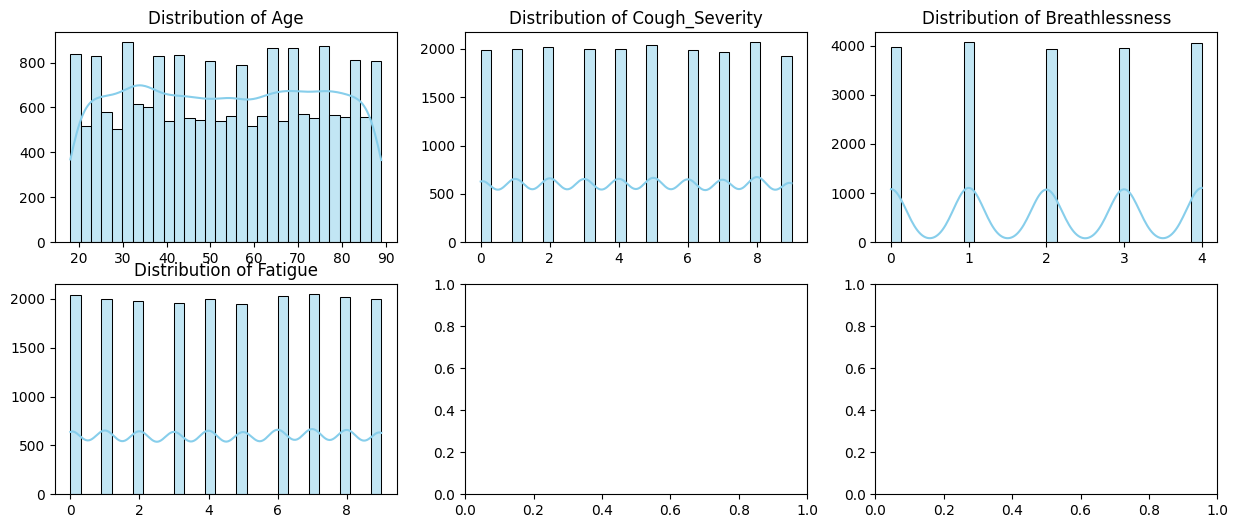

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.histplot(df.select_dtypes(include='number')[col], ax=ax, kde=True, color='skyblue', bins=30)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

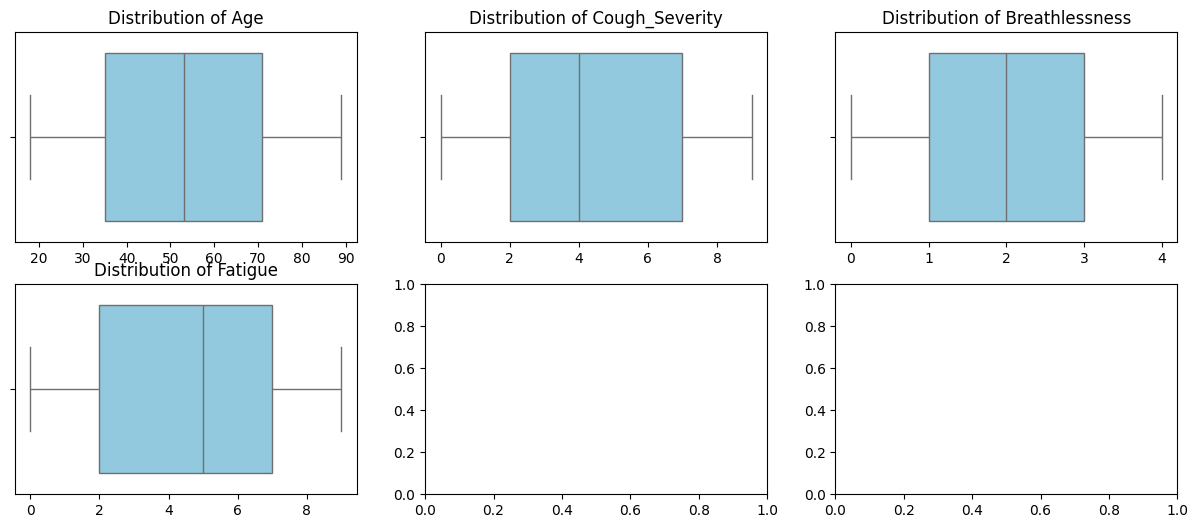

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.boxplot(df.select_dtypes(include='number')[col], ax=ax, color='skyblue', orient='h')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

C:\Users\jayaw\AppData\Local\Temp\ipykernel_22052\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_22052\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_22052\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_22052\991270672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

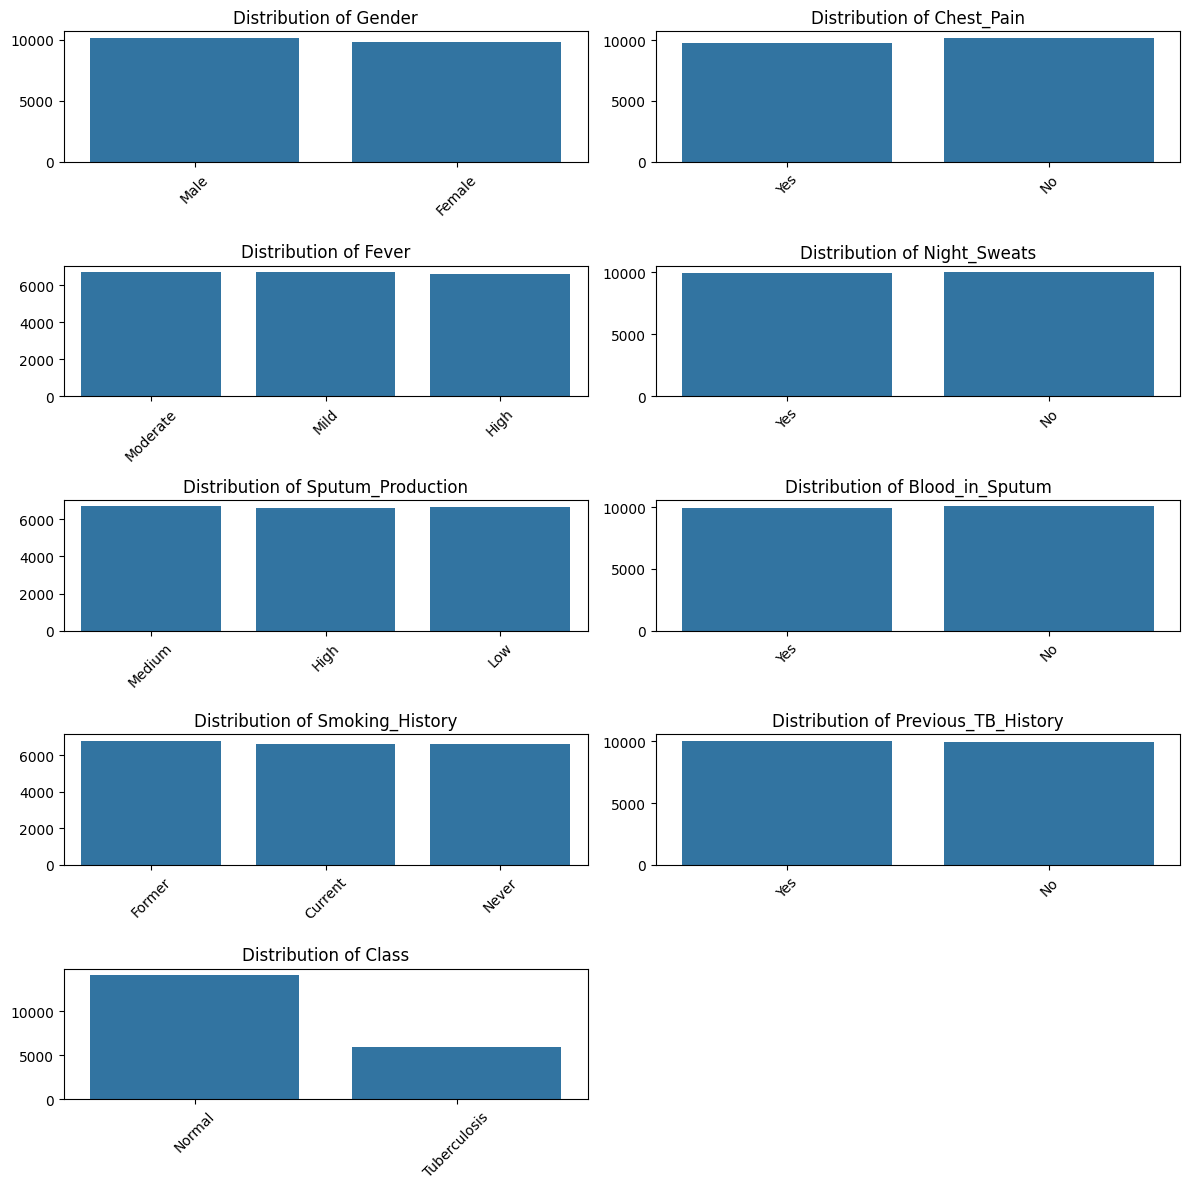

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))  # 2x2 grid
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns[1:len(axes)]  # Ensure we don't exceed subplot count

for col, ax in zip(cat_cols, axes):
    sns.countplot(data=df, x=col, ax=ax)  # Assign ax
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('')

# Hide unused subplots if df has fewer than 4 categorical columns
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Data Preprocessing

Dataset version:

- v1: Label encoding
- v2: One-hot encoding
- v3: Label encoding + MinMax Scaler
- v4: Label encoding + Standard Scaler
- v5: One-hot encoding + MinMax Scaler
- v6: One-hot encoding + Standard Scaler

In [13]:
df = df.drop('Patient_ID', axis=1)

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

In [16]:
cols_to_scale = ['Age', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss']

### Encoding

- #### Label Encoding

In [17]:
df_v1 = df.copy()

In [18]:
le = LabelEncoder()
for i in categorical_cols:
    df_v1[i] = le.fit_transform(df_v1[i])

In [19]:
df_v1.head()

Age  Gender  Chest_Pain  Cough_Severity  Breathlessness  Fatigue  \
0   69       1           1               1               2        3   
1   32       0           1               3               0        9   
2   89       1           0               7               0        3   
3   78       0           1               2               0        6   
4   38       1           0               7               2        5   

   Weight_Loss  Fever  Night_Sweats  Sputum_Production  Blood_in_Sputum  \
0         2.37      2             1                  2                1   
1         6.09      2             0                  2                0   
2         2.86      1             1                  2                0   
3         4.57      2             0                  0                1   
4        13.86      0             1                  1                0   

   Smoking_History  Previous_TB_History  Class  
0                1                    1      0  
1                0                    1      0  
2                0                    0      1  
3                2                    1      1  
4                2                    1      1

- #### One Hot Encoding

In [22]:
df_v2 = df.copy()

In [ ]:
def one_hot_encoding(df, categorical_cols):
    for col in categorical_cols:
        dummies = pd.get_dummies(df[col], prefix=col).astype(int)
        col_index = df.columns.get_loc(col) + 1
        for dummy_col in reversed(dummies.columns):
            df.insert(col_index, dummy_col, dummies[dummy_col])
        df.drop(col, axis=1, inplace=True)
    return df

In [23]:
df_v2 = one_hot_encoding(df_v2, categorical_cols)

In [24]:
df_v2.head()

Age  Gender_Female  Gender_Male  Chest_Pain_No  Chest_Pain_Yes  \
0   69              0            1              0               1   
1   32              1            0              0               1   
2   89              0            1              1               0   
3   78              1            0              0               1   
4   38              0            1              1               0   

   Cough_Severity  Breathlessness  Fatigue  Weight_Loss  Fever_High  ...  \
0               1               2        3         2.37           0  ...   
1               3               0        9         6.09           0  ...   
2               7               0        3         2.86           0  ...   
3               2               0        6         4.57           0  ...   
4               7               2        5        13.86           1  ...   

   Sputum_Production_Medium  Blood_in_Sputum_No  Blood_in_Sputum_Yes  \
0                         1                   0                    1   
1                         1                   1                    0   
2                         1                   1                    0   
3                         0                   0                    1   
4                         0                   1                    0   

   Smoking_History_Current  Smoking_History_Former  Smoking_History_Never  \
0                        0                       1                      0   
1                        1                       0                      0   
2                        1                       0                      0   
3                        0                       0                      1   
4                        0                       0                      1   

   Previous_TB_History_No  Previous_TB_History_Yes  Class_Normal  \
0                       0                        1             1   
1                       0                        1             1   
2                       1                        0             0   
3                       0                        1             0   
4                       0                        1             0   

   Class_Tuberculosis  
0                   0  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 26 columns]

- #### Label Encoding + MinMax Scaler

In [25]:
df_v3 = df_v1.copy()

In [27]:
for i in cols_to_scale:
    scaler = MinMaxScaler()
    df_v3[i] = scaler.fit_transform(df_v3[[i]])

In [28]:
df_v3.head()

Age  Gender  Chest_Pain  Cough_Severity  Breathlessness   Fatigue  \
0  0.718310       1           1        0.111111             0.5  0.333333   
1  0.197183       0           1        0.333333             0.0  1.000000   
2  1.000000       1           0        0.777778             0.0  0.333333   
3  0.845070       0           1        0.222222             0.0  0.666667   
4  0.281690       1           0        0.777778             0.5  0.555556   

   Weight_Loss  Fever  Night_Sweats  Sputum_Production  Blood_in_Sputum  \
0     0.158000      2             1                  2                1   
1     0.406000      2             0                  2                0   
2     0.190667      1             1                  2                0   
3     0.304667      2             0                  0                1   
4     0.924000      0             1                  1                0   

   Smoking_History  Previous_TB_History  Class  
0                1                    1      0  
1                0                    1      0  
2                0                    0      1  
3                2                    1      1  
4                2                    1      1

- #### Label Encoding + Standard Scaler

In [29]:
df_v4 = df_v1.copy()

In [30]:
for i in cols_to_scale:
    scaler = StandardScaler()
    df_v4[i] = scaler.fit_transform(df_v4[[i]])

In [31]:
df_v4.head()

Age  Gender  Chest_Pain  Cough_Severity  Breathlessness   Fatigue  \
0  0.747711       1           1       -1.218770       -0.002435 -0.523498   
1 -1.033407       0           1       -0.520604       -1.413780  1.558765   
2  1.710478       1           0        0.875726       -1.413780 -0.523498   
3  1.180956       0           1       -0.869687       -1.413780  0.517633   
4 -0.744577       1           0        0.875726       -0.002435  0.170589   

   Weight_Loss  Fever  Night_Sweats  Sputum_Production  Blood_in_Sputum  \
0    -1.171790      2             1                  2                1   
1    -0.314598      2             0                  2                0   
2    -1.058880      1             1                  2                0   
3    -0.664849      2             0                  0                1   
4     1.475825      0             1                  1                0   

   Smoking_History  Previous_TB_History  Class  
0                1                    1      0  
1                0                    1      0  
2                0                    0      1  
3                2                    1      1  
4                2                    1      1

- #### One Hot Encoding + MinMax Scaler

In [32]:
df_v5 = df_v2.copy()

In [33]:
for i in cols_to_scale:
    scaler = MinMaxScaler()
    df_v5[i] = scaler.fit_transform(df_v5[[i]])

In [34]:
df_v5.head()

Age  Gender_Female  Gender_Male  Chest_Pain_No  Chest_Pain_Yes  \
0  0.718310              0            1              0               1   
1  0.197183              1            0              0               1   
2  1.000000              0            1              1               0   
3  0.845070              1            0              0               1   
4  0.281690              0            1              1               0   

   Cough_Severity  Breathlessness   Fatigue  Weight_Loss  Fever_High  ...  \
0        0.111111             0.5  0.333333     0.158000           0  ...   
1        0.333333             0.0  1.000000     0.406000           0  ...   
2        0.777778             0.0  0.333333     0.190667           0  ...   
3        0.222222             0.0  0.666667     0.304667           0  ...   
4        0.777778             0.5  0.555556     0.924000           1  ...   

   Sputum_Production_Medium  Blood_in_Sputum_No  Blood_in_Sputum_Yes  \
0                         1                   0                    1   
1                         1                   1                    0   
2                         1                   1                    0   
3                         0                   0                    1   
4                         0                   1                    0   

   Smoking_History_Current  Smoking_History_Former  Smoking_History_Never  \
0                        0                       1                      0   
1                        1                       0                      0   
2                        1                       0                      0   
3                        0                       0                      1   
4                        0                       0                      1   

   Previous_TB_History_No  Previous_TB_History_Yes  Class_Normal  \
0                       0                        1             1   
1                       0                        1             1   
2                       1                        0             0   
3                       0                        1             0   
4                       0                        1             0   

   Class_Tuberculosis  
0                   0  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 26 columns]

- #### One Hot Encoding + Standard Scaler

In [35]:
df_v6 = df_v2.copy()

In [36]:
for i in cols_to_scale:
    scaler = StandardScaler()
    df_v6[i] = scaler.fit_transform(df_v6[[i]])

In [37]:
df_v6.head()

Age  Gender_Female  Gender_Male  Chest_Pain_No  Chest_Pain_Yes  \
0  0.747711              0            1              0               1   
1 -1.033407              1            0              0               1   
2  1.710478              0            1              1               0   
3  1.180956              1            0              0               1   
4 -0.744577              0            1              1               0   

   Cough_Severity  Breathlessness   Fatigue  Weight_Loss  Fever_High  ...  \
0       -1.218770       -0.002435 -0.523498    -1.171790           0  ...   
1       -0.520604       -1.413780  1.558765    -0.314598           0  ...   
2        0.875726       -1.413780 -0.523498    -1.058880           0  ...   
3       -0.869687       -1.413780  0.517633    -0.664849           0  ...   
4        0.875726       -0.002435  0.170589     1.475825           1  ...   

   Sputum_Production_Medium  Blood_in_Sputum_No  Blood_in_Sputum_Yes  \
0                         1                   0                    1   
1                         1                   1                    0   
2                         1                   1                    0   
3                         0                   0                    1   
4                         0                   1                    0   

   Smoking_History_Current  Smoking_History_Former  Smoking_History_Never  \
0                        0                       1                      0   
1                        1                       0                      0   
2                        1                       0                      0   
3                        0                       0                      1   
4                        0                       0                      1   

   Previous_TB_History_No  Previous_TB_History_Yes  Class_Normal  \
0                       0                        1             1   
1                       0                        1             1   
2                       1                        0             0   
3                       0                        1             0   
4                       0                        1             0   

   Class_Tuberculosis  
0                   0  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 26 columns]

## Train Test Split

In [38]:
datasets = {
    'df1': df_v1,
    'df2': df_v2,
    'df3': df_v3,
    'df4': df_v4,
    'df5': df_v5,
    'df6': df_v6
}

In [39]:
# Dictionary to store train and test splits
train_sets = {}
test_sets = {}

# Perform train-test split separately for each dataset
for name, df in datasets.items():
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_sets[name] = train_df  # Store train set
    test_sets[name] = test_df    # Store test set

# Access train and test splits
df_v1_train = train_sets['df1']
df_v1_test = test_sets['df1']

df_v2_train = train_sets['df2']
df_v2_test = test_sets['df2']

df_v3_train = train_sets['df3']
df_v3_test = test_sets['df3']

df_v4_train = train_sets['df4']
df_v4_test = test_sets['df4']

df_v5_train = train_sets['df5']
df_v5_test = test_sets['df5']

df_v6_train = train_sets['df6']
df_v6_test = test_sets['df6']

In [40]:
datasets = [
    ['Label encoding', [df_v1_train[df_v1_train.columns[:-1]], df_v1_train[df_v1_train.columns[-1]], df_v1_test[df_v1_test.columns[:-1]], df_v1_test[df_v1_test.columns[-1]]]],
    ['One-hot encoding', [df_v2_train[df_v2_train.columns[:-1]], df_v2_train[df_v2_train.columns[-1]], df_v2_test[df_v2_test.columns[:-1]], df_v2_test[df_v2_test.columns[-1]]]],
    ['Label encoding + MinMax scaler', [df_v3_train[df_v3_train.columns[:-1]], df_v3_train[df_v3_train.columns[-1]], df_v3_test[df_v3_test.columns[:-1]], df_v3_test[df_v3_test.columns[-1]]]],
    ['Label encoding + Standard scaler', [df_v4_train[df_v4_train.columns[:-1]], df_v4_train[df_v4_train.columns[-1]], df_v4_test[df_v4_test.columns[:-1]], df_v4_test[df_v4_test.columns[-1]]]],
    ['One-hot encoding + MinMax scaler', [df_v5_train[df_v5_train.columns[:-1]], df_v5_train[df_v5_train.columns[-1]], df_v5_test[df_v5_test.columns[:-1]], df_v5_test[df_v5_test.columns[-1]]]],
    ['One-hot encoding + Standard scaler', [df_v6_train[df_v6_train.columns[:-1]], df_v6_train[df_v6_train.columns[-1]], df_v6_test[df_v6_test.columns[:-1]], df_v6_test[df_v6_test.columns[-1]]]]
]